## Data

In [1]:
from old_source_code.data import create_joint_x_y
from sklearn.preprocessing import StandardScaler
import numpy as np

num_points_to_generate = 1000
num_latent_points_to_generate = 1000


scaler = StandardScaler()
X, Y = create_joint_x_y(num_points_to_generate)
X_test, Y_test = create_joint_x_y(num_points_to_generate)

X_scaled = X
X_test_scaled = X_test

n, d = Y.shape
U = np.random.normal(size=(num_latent_points_to_generate, d))
m = U.shape[0]

nu = np.ones((n, 1)) / n
mu = np.ones((m, 1)) / m

## ICNN 

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch

In [3]:
from cpflow.core_flow import CPFlow

In [4]:
depth = 10
k = 64
lr = 0.001
factor = 0.5
patience = 2000
num_epochs = 20
print_every = 100

batch_size_train = 64
batch_size_test = 64

n_blocks = 4
dimy = d
dimc = X_scaled.shape[1]

device = "cuda:0"

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32, device=device)
Y_tensor = torch.tensor(Y, dtype=torch.float32, device=device)

X_test_scaled_tensor = torch.tensor(X_test_scaled, dtype=torch.float32, device=device)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32, device=device)

train_loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(X_scaled_tensor, Y_tensor),
    batch_size=batch_size_train,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(X_test_scaled_tensor, Y_test_tensor),
    batch_size=batch_size_test,
    shuffle=True,
)

In [7]:
flow = CPFlow(
    response_dimension=dimy,
    feature_dimension=dimc,
    hidden_dimension=k,
    number_of_hidden_layers=depth,
    n_blocks=n_blocks,
)

In [8]:
device_and_dtype_specifications = dict(dtype=torch.float32, device=device)

In [9]:
flow = flow.to(**device_and_dtype_specifications)

In [10]:
print(matplotlib.get_backend())

module://matplotlib_inline.backend_inline


In [11]:
flow.fit(
    train_loader=train_loader,
    train_params={
        "num_epochs": num_epochs,
        "batch_size": batch_size_train,
        "lr": lr,
        "print_every": print_every,
    },
)

  0%|          | 0/20 [00:00<?, ?it/s]

init loss: -1.719653844833374
10 -1.7790581941604615
20 -3.1793965965509416
30 -4.9966009765863415
40 -6.661030986905098
50 -8.183321204781532
60 -9.912020161747932
70 -11.601524010300636
80 -13.204719665646554
90 -14.850778356194496
100 -16.54301497042179
110 -18.237306848168373
120 -19.706632509827614
130 -21.44517984688282
140 -23.111508992314338
150 -24.69725197851658
160 -26.439651241898538
170 -28.044822433590888
180 -29.733026137948038
190 -31.387517967820166
200 -32.9103474766016
210 -34.55652606785297
220 -36.25791492760182
230 -37.81514722406864
240 -39.48980988562107
250 -41.13047504723072
260 -42.74800834953785
270 -44.436825183033946
280 -46.102558496594426
290 -47.72086452543736
300 -49.40764155685902
310 -51.07157352268696
320 -52.71505996286869


CPFlow(
  (flow): SequentialFlow(
    (flows): ModuleList(
      (0): ActNorm(2)
      (1): DeepConvexFlow(
        ConjGrad(rtol=0.0, atol=0.001)
        (icnn): PICNN(
          (act): Softplus()
          (act_c): ELU(alpha=1.0)
          (Wzs): ModuleList(
            (0): Linear(in_features=2, out_features=64, bias=True)
            (1-9): 9 x PosLinear(in_features=64, out_features=64, bias=True)
            (10): PosLinear(in_features=64, out_features=1, bias=False)
          )
          (Wxs): ModuleList(
            (0-8): 9 x Linear(in_features=2, out_features=64, bias=True)
            (9): Linear(in_features=2, out_features=1, bias=False)
          )
          (Wcs): ModuleList(
            (0): Linear(in_features=1, out_features=64, bias=True)
          )
          (Wczs): ModuleList(
            (0-9): 10 x Linear(in_features=64, out_features=64, bias=True)
          )
          (Wcxs): ModuleList(
            (0-9): 10 x Linear(in_features=64, out_features=2, bias=True)
 

In [12]:
# matplotlib.use("QtAgg")

/home/nkotelevskii/github/conditional_quantile_function/src/cpflow/cpflows.py:219: UserWarning: brute force
  warnings.warn("brute force")


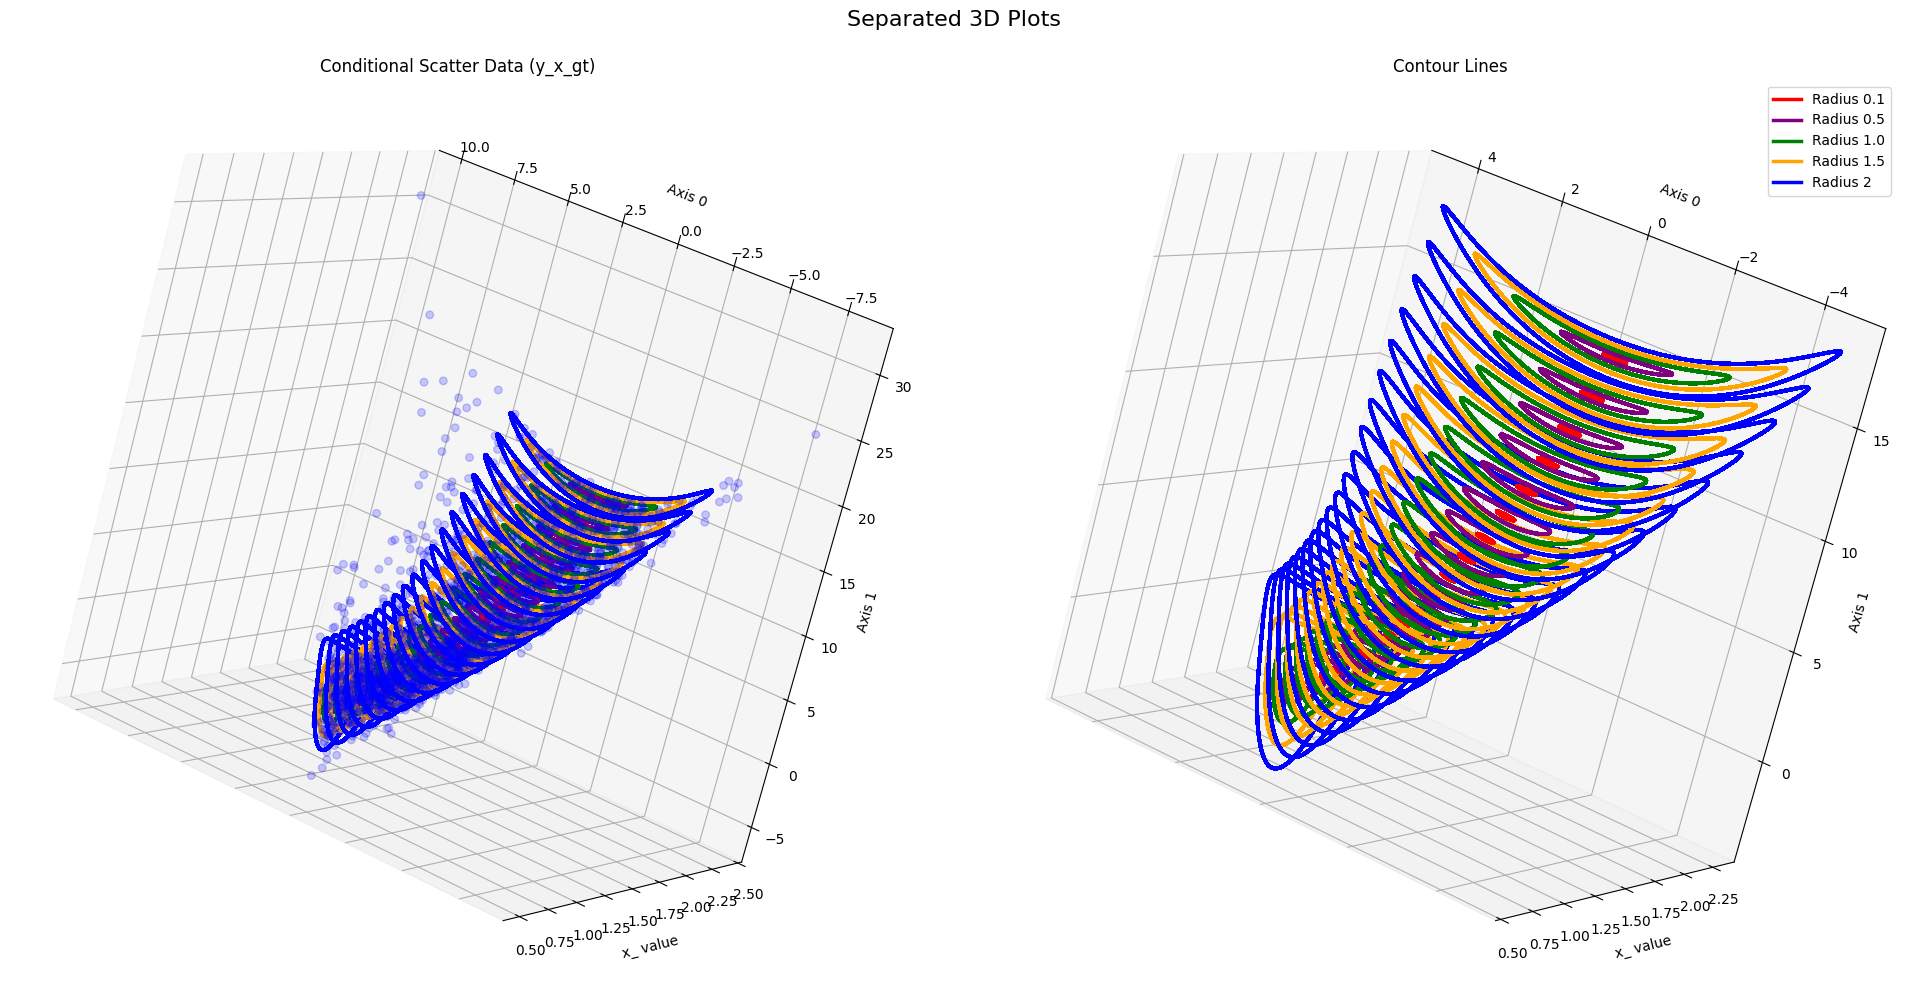

In [13]:
# Change to %matplotlib qt to have interactive plots
%matplotlib inline

from old_source_code.data import create_conditional_x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={"projection": "3d"})
fig.suptitle("Separated 3D Plots", fontsize=16)

ax1.set_title("Conditional Scatter Data (y_x_gt)")
ax1.set_xlabel("Axis 0")
ax1.set_ylabel("Axis 1")
ax1.set_zlabel("x_ value")

for x_ in range(50, 250, 10):
    x = np.array([x_ / 100])[:, None]

    # This section is now active for the first plot
    _, y_x_gt = create_conditional_x(n_points=100, x_value=x_ / 100)
    z_scatter = np.full(y_x_gt.shape[0], x)
    ax1.scatter(
        y_x_gt[:, 0], y_x_gt[:, 1], z_scatter, color="blue", marker="o", s=30, alpha=0.2
    )

ax1.view_init(elev=-55, azim=154, roll=-83)

ax2.set_title("Contour Lines")
ax2.set_xlabel("Axis 0")
ax2.set_ylabel("Axis 1")
ax2.set_zlabel("x_ value")

loop_start_value = 50
for x_ in range(loop_start_value, 250, 10):
    x = torch.tensor([x_ / 100], **device_and_dtype_specifications)[:, None]
    x = x.repeat(repeats=(100, 1))

    colors = ["red", "purple", "green", "orange", "blue"]
    radii = [0.1, 0.5, 1.0, 1.5, 2]
    for contour_radius, color in zip(radii, colors):
        pi_tensor = torch.linspace(-torch.pi, torch.pi, 100)
        u_tensor = torch.stack(
            [
                contour_radius * torch.cos(pi_tensor),
                contour_radius * torch.sin(pi_tensor),
            ],
            dim=1,
        )

        u_tensor = u_tensor.to(**device_and_dtype_specifications)
        u_tensor.requires_grad = True

        pushforward_of_u = flow.push_forward_u_given_x(U=u_tensor, X=x).cpu()

        z_line = x.detach().cpu().numpy()
        label = f"Radius {contour_radius}" if x_ == loop_start_value else ""
        ax1.plot(
            pushforward_of_u[:, 0],
            pushforward_of_u[:, 1],
            z_line,
            color=color,
            linewidth=2.5,
            label=label,
        )
        ax2.plot(
            pushforward_of_u[:, 0],
            pushforward_of_u[:, 1],
            z_line,
            color=color,
            linewidth=2.5,
            label=label,
        )

ax2.view_init(elev=-55, azim=154, roll=-83)
ax2.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
plt.show()

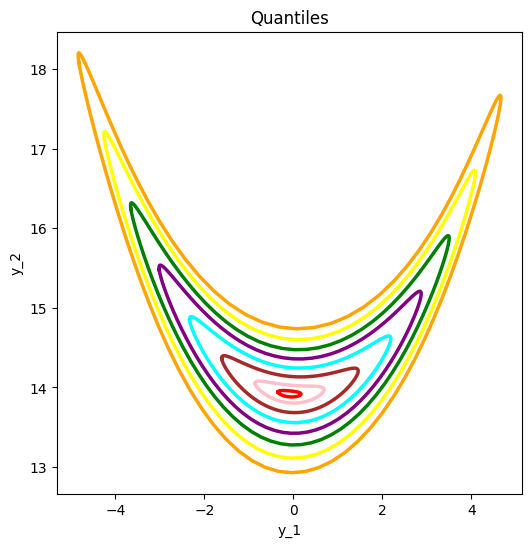

In [14]:
# Change to %matplotlib qt to have interactive plots
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))

ax1.set_title("Quantiles")
ax1.set_xlabel("y_1")
ax1.set_ylabel("y_2")
x = torch.tensor([2.4], **device_and_dtype_specifications)[:, None]
x = x.repeat(u_tensor.shape[0], 1)


colors = ["red", "pink", "brown", "cyan", "purple", "green", "yellow", "orange"]
radii = [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 5]
for contour_radius, color in zip(radii, colors):
    pi_tensor = torch.linspace(-torch.pi, torch.pi, 100)
    u_tensor = torch.stack(
        [
            contour_radius * torch.cos(pi_tensor),
            contour_radius * torch.sin(pi_tensor),
        ],
        dim=1,
    )

    u_tensor = u_tensor.to(**device_and_dtype_specifications)
    u_tensor.requires_grad = True
    pushforward_of_u = flow.push_forward_u_given_x(U=u_tensor, X=x).cpu()

    ax1.plot(pushforward_of_u[:, 0], pushforward_of_u[:, 1], color=color, linewidth=2.5)

# Sample y from the flow 

In [15]:
x = torch.tensor([1.234], dtype=torch.float32, device="cuda:0")[:, None]

y = flow.sample_y_given_x(n_samples=1000, X=x)

densities = torch.exp(flow.logp_cond(y, X=x)).cpu()
normalized_points = flow.push_backward_y_given_x(y, X=x).cpu()
y = y.cpu()

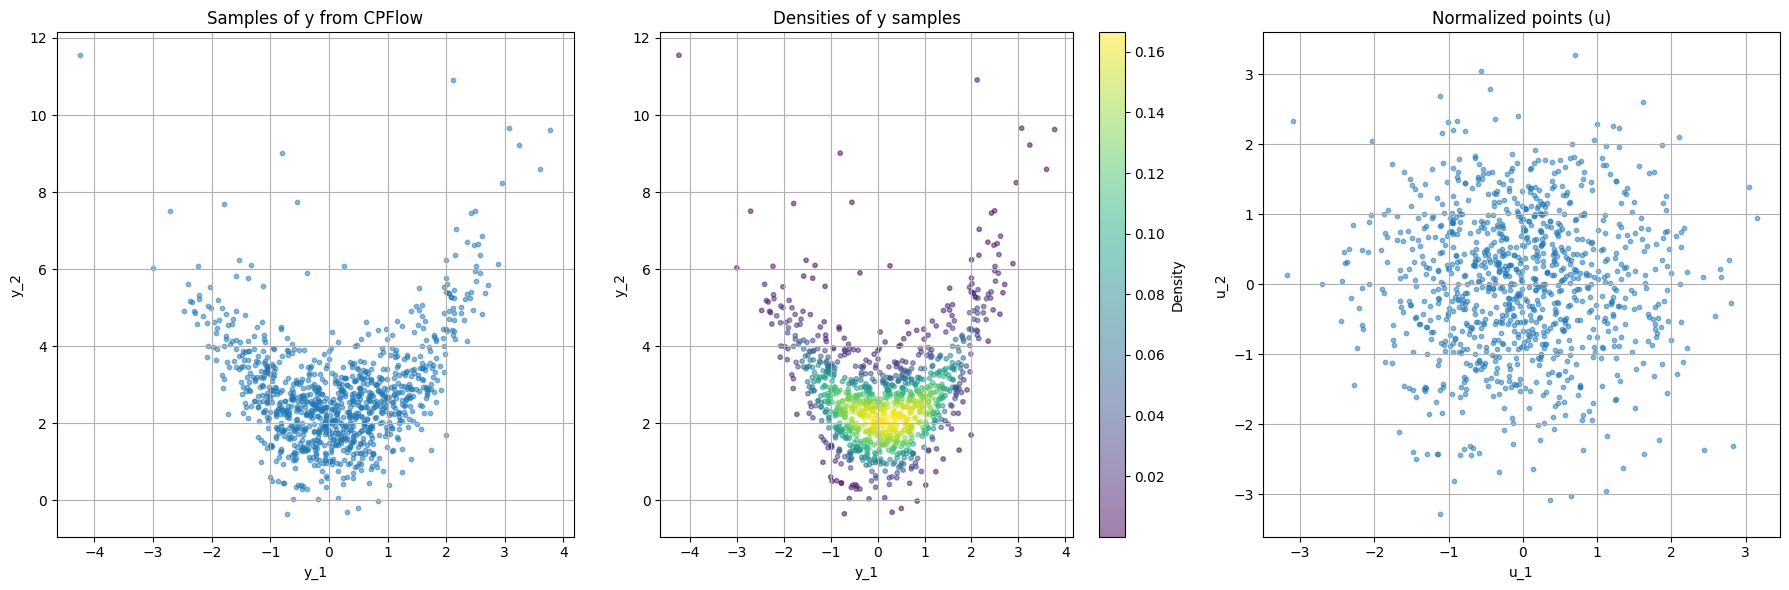

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Left: y samples
ax1.scatter(y[:, 0], y[:, 1], alpha=0.5, s=10)
ax1.set_title("Samples of y from CPFlow")
ax1.set_xlabel("y_1")
ax1.set_ylabel("y_2")
ax1.grid(True)

# Middle: densities as color
sc = ax2.scatter(
    y[:, 0], y[:, 1], c=densities.detach().numpy(), cmap="viridis", alpha=0.5, s=10
)
ax2.set_title("Densities of y samples")
ax2.set_xlabel("y_1")
ax2.set_ylabel("y_2")
ax2.grid(True)
plt.colorbar(sc, ax=ax2, label="Density")

# Right: normalized points
ax3.scatter(
    normalized_points[:, 0], normalized_points[:, 1], alpha=0.5, s=10, color="tab:blue"
)
ax3.set_title("Normalized points (u)")
ax3.set_xlabel("u_1")
ax3.set_ylabel("u_2")
ax3.grid(True)

plt.tight_layout()
plt.show()